# AdaGrad for adaptive learning rate

Dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bank_data = pd.read_csv("C:/Users/Pedram/ML_LAB_4/bank-additional.csv", sep= ";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank_data.drop(["day_of_week","previous","duration","month","contact"],axis=1,inplace=True)
bank_data.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,2,999,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,4,999,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,1,999,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,3,999,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,1,999,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
bank_data['y'] =list(map(lambda x: 0 if x=="no" else 1,bank_data.y))
bank_data = pd.get_dummies(bank_data)

### Dividing the datasets into Test and Train datasets

In [5]:
bank_train = bank_data.sample(frac=0.8, random_state=1)
bank_test = bank_data.drop(bank_train.index)
bank_train.reset_index(drop=True,inplace=True)
bank_test.reset_index(drop=True,inplace=True)

In [6]:
bank_train_X = bank_train.drop(["y"], axis=1) #separate X & Y for test and train data
bank_train_Y = bank_train[["y"]]

bank_test_X = bank_test.drop(["y"], axis=1)
bank_test_Y = bank_test[["y"]]

In [7]:
bank_train_X = (bank_train_X - bank_train_X.mean())/(bank_train_X.std()+0.000001) # Data normalization
bank_test_X = (bank_test_X - bank_test_X.mean())/(bank_test_X.std()+0.000001)

In [8]:
bank_train_X = bank_train_X.as_matrix() # Training 
bank_train_X = np.hstack((np.ones((len(bank_train_X),1)),bank_train_X))
bank_train_Y = bank_train_Y.as_matrix()
bank_train_Y = np.array(bank_train_Y).flatten() 

In [9]:
### Test Datasets

In [10]:
bank_test_X = bank_test_X.as_matrix()
bank_test_X = np.hstack((np.ones((len(bank_test_X),1)),bank_test_X))
bank_test_Y = bank_test_Y.as_matrix()
bank_test_Y = np.array(bank_test_Y).flatten()

### Computing logloss

In [11]:
 
def loglossfunction(act, pred):
    epsilon = 1e-15
    pred = np.maximum(epsilon, pred)
    pred = np.minimum(1-epsilon, pred)
    log_loss = np.sum(act*np.log(pred) + np.subtract(1,act)*np.log(np.subtract(1,pred)))
    log_loss = log_loss * -1.0/len(act)
    return log_loss

In [12]:
def shuffle_matries(x,y): #randomly shuffles the two matrices
    index = np.arange(len(x))   
    np.random.shuffle(index)
    y = y[index]
    x = x[index,:]
    return x,y

# Same Calculation for occupancy detection dataset

In [17]:
occupancy = pd.read_csv("C:/Users/Pedram/ML_LAB_4/datatraining.txt",sep=",")
occupancy.drop(["date"], axis=1, inplace=True)

### Dividing the datasets into Test and Train datasets

In [18]:
occupancy_train = occupancy.sample(frac=0.8, random_state=1)
occupancy_test = occupancy.drop(occupancy_train.index)
occupancy_train.reset_index(drop=True,inplace=True)
occupancy_test.reset_index(drop=True,inplace=True)

### separating X and Y

In [19]:
occupancy_train_X = occupancy_train.drop(["Occupancy"], axis=1)
occupancy_train_Y = occupancy_train[["Occupancy"]]
occupancy_test_X = occupancy_test.drop(["Occupancy"], axis=1)
occupancy_test_Y = occupancy_test[["Occupancy"]]
#normaliz the data
occupancy_train_X = (occupancy_train_X - occupancy_train_X.mean())/(occupancy_train_X.std()+0.000001)
occupancy_test_X = (occupancy_test_X - occupancy_test_X.mean())/(occupancy_test_X.std()+0.000001)

### Training Datasets

In [20]:
occupancy_train_X = occupancy_train_X.as_matrix()
occupancy_train_X = np.hstack((np.ones((len(occupancy_train_X),1)),occupancy_train_X))
occupancy_train_Y = occupancy_train_Y.as_matrix()
occupancy_train_Y = np.array(occupancy_train_Y).flatten()

In [25]:
def log_reg_SGD_AdaGrad(x_train, y_train, x_test, y_test, beta, mu_zero, numIterations):
    
    h = np.zeros(x_train.shape[1])
    Training_logloss = []
    Test_logloss =[]
    
    for i in range(0,numIterations):
        x_train,y_train = shuffle_matries(x_train, y_train)
        for j in range(0, 1000):
            logit = 1/(1+np.exp(-1*np.dot(x_train, beta)))
            logloss = loglossfunction(y_train, logit)
            gradient = np.dot(x_train[j,:].transpose(),(y_train[j] - logit[j]))* -1.0
            
            #AdaGrad
            h += gradient**2
            mu = mu_zero*(1/np.sqrt(h))
            
            beta = beta - (mu* gradient)
            
        logit_new = 1/(1+np.exp(-1*np.dot(x_train, beta)))
        logloss_new = loglossfunction(y_train, logit_new)
        Training_logloss.append(logloss_new)

        logit_test = 1/(1+np.exp(-1*np.dot(x_test, beta)))
        logloss_test = loglossfunction(y_test, logit_test)
        Test_logloss.append(logloss_test)
        print("Epochs %d | logloss: %f" % (i, logloss_test))
    return beta, Training_logloss, Test_logloss

Run the SGD algorithm

In [26]:
mu_zero= 0.1*np.ones(occupancy_train_X.shape[1])
beta = np.ones(occupancy_train_X.shape[1])
results = log_reg_SGD_AdaGrad(occupancy_train_X,occupancy_train_Y, occupancy_train_X, occupancy_train_Y, beta,mu_zero,100)

Epochs 0 | logloss: 0.122282
Epochs 1 | logloss: 0.101421
Epochs 2 | logloss: 0.091445
Epochs 3 | logloss: 0.085078
Epochs 4 | logloss: 0.081133
Epochs 5 | logloss: 0.078436
Epochs 6 | logloss: 0.076396
Epochs 7 | logloss: 0.075218
Epochs 8 | logloss: 0.073983
Epochs 9 | logloss: 0.073538
Epochs 10 | logloss: 0.072294
Epochs 11 | logloss: 0.071440
Epochs 12 | logloss: 0.070698
Epochs 13 | logloss: 0.070225
Epochs 14 | logloss: 0.069868
Epochs 15 | logloss: 0.069273
Epochs 16 | logloss: 0.068775
Epochs 17 | logloss: 0.068410
Epochs 18 | logloss: 0.068004
Epochs 19 | logloss: 0.067693
Epochs 20 | logloss: 0.067608
Epochs 21 | logloss: 0.067389
Epochs 22 | logloss: 0.067122
Epochs 23 | logloss: 0.066809
Epochs 24 | logloss: 0.066565
Epochs 25 | logloss: 0.066631
Epochs 26 | logloss: 0.066495
Epochs 27 | logloss: 0.066241
Epochs 28 | logloss: 0.065881
Epochs 29 | logloss: 0.065664
Epochs 30 | logloss: 0.065618
Epochs 31 | logloss: 0.065457
Epochs 32 | logloss: 0.065318
Epochs 33 | logloss:

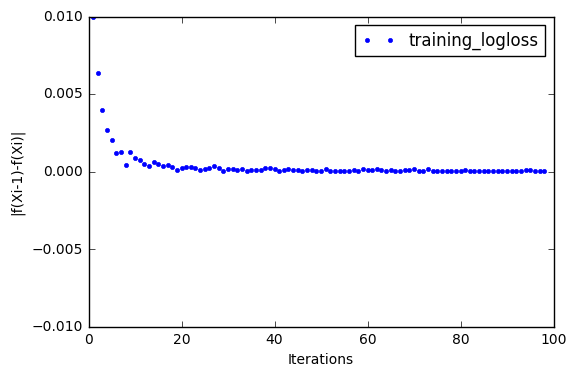

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


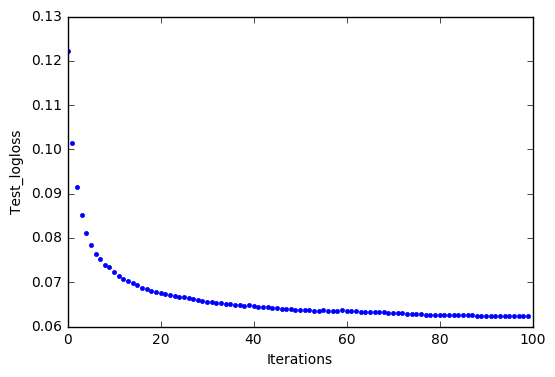

In [27]:
training_logloss = results[1] 
loss_diff = [ abs(t - s) for s, t in zip(training_logloss, training_logloss[1:])]
plt.plot(loss_diff,'.', label='training_logloss')
plt.xlabel('Iterations')
plt.ylabel('|f(Xi-1)-f(Xi)|')
plt.legend()
plt.ylim(-0.01,0.01)
plt.show()
Test_logloss = results[2] 
plt.plot(Test_logloss,'.')
plt.xlabel('Iterations')
plt.ylabel('Test_logloss')
plt.legend()
plt.show()